<a href="https://colab.research.google.com/github/dionysus98/l_torch/blob/main/01_torch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch workflow

- Resources:
  - [Pytorch Book](https://www.learnpytorch.io/)
  - [Source code for the book](https://github.com/mrdbourke/pytorch-deep-learning)

In [2]:
to_cover = {
    1: "data (prepare and load)",
    2: "build a model",
    3: "fitting(traning) the modal",
    4: "making predictions and evaluating the model",
    5: "saving, loading the model",
    6: "putting it all together"
    }

In [7]:
import torch
from torch import nn ## neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

## 1. Data - Preparing and Loading

In [4]:
# Linear regression

# make a straight line with *known* paramters
w = 0.7 #weight
b = 0.3 #bias

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1) # input matrix `X`
# y = Ax + b, slope formula
y = w * X + b # output

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Spliting data into training and test sets

- traning set
- validation set [?]
- test set



In [6]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test),


(40, 40, 10, 10)

### Visualize data

In [18]:
def plot_preds(train_data=X_train, train_labels=y_train,
               test_data=X_test, test_labels=y_test,
               predictions=None):
  "Plots training & test data, compares predictions"
  plt.figure(figsize=(7, 7))
  # plot training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

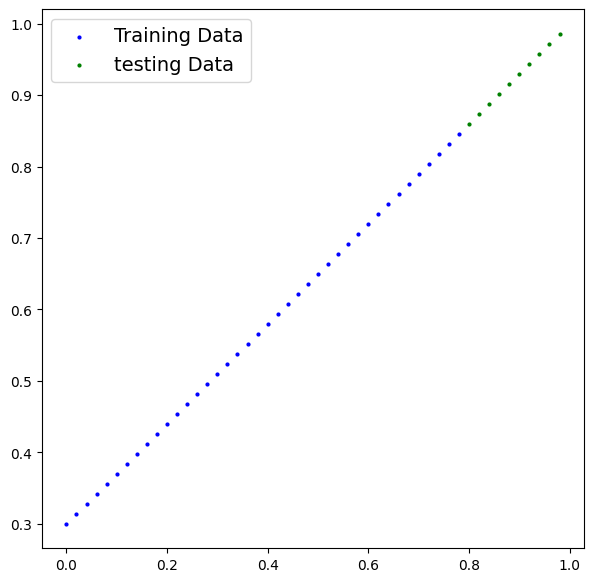

In [19]:
plot_preds()

## 2. Build Model

In [23]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
        torch.randn(1,
                    requires_grad=True,
                    dtype=torch.float))

    self.bias = nn.Parameter(
        torch.randn(1,
                    requires_grad=True,
                    dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weigths * x + self.bias

### model building essentials
- torch.nn
- torch.nn.Parameter
- torch.nn.Module
- torch.optim
- def forward()

tensor([1.1327], requires_grad=True)